In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./datasets/student_demography.csv")
df.head()


,index,Id,Born,Raised,Residence,Transportation,Commute,Family,Area,Batch,province,region
0,1,402,Kathmandu,Kathmandu,Chabahil,Foot,25,3,North East,25B,Province 3,Hilly
1,5,412,Morang,Morang,kalo pul,Foot,5,4,West,25B,Province 2,Terai
2,4,413,Kathmandu,Kathmandu,Narayantaar,Scooter,25,5,North,25B,Province 3,Hilly
3,2,416,Kathmandu,Kathmandu,Baneshwor,Scooter,10,8,East,25B,Province 3,Hilly
4,3,417,Lalitpur,Lalitpur,Godawari,Scooter,40,5,South,25B,Province 3,Hilly


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           132 non-null    int64 
 1   Id              132 non-null    int64 
 2   Born            132 non-null    object
 3   Raised          132 non-null    object
 4   Residence       132 non-null    object
 5   Transportation  132 non-null    object
 6   Commute         132 non-null    int64 
 7   Family          132 non-null    int64 
 8   Area            132 non-null    object
 9   Batch           132 non-null    object
 10  province        132 non-null    object
 11  region          132 non-null    object
dtypes: int64(4), object(8)
memory usage: 12.5+ KB


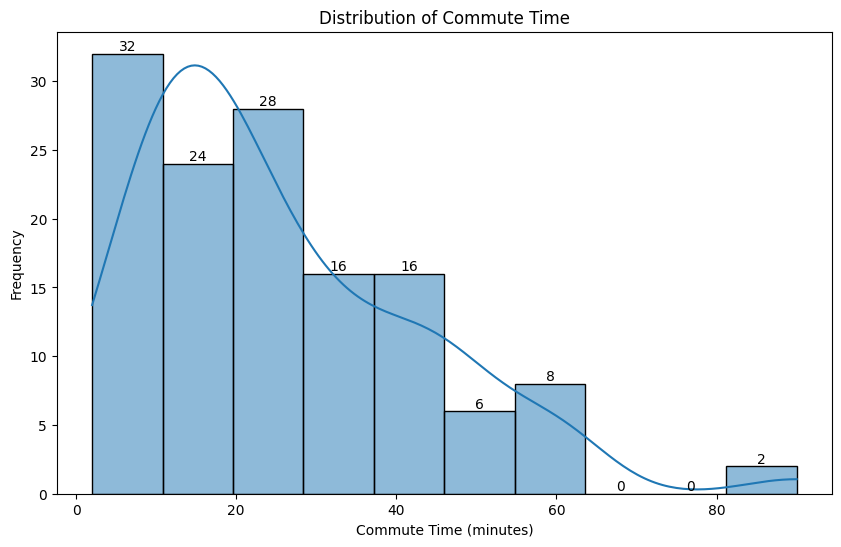

In [4]:
# Distribution of commute time
plt.figure(figsize=(10, 6))
ax = sns.histplot(df["Commute"], bins=10, kde=True)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height}", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom"
    )
plt.xlabel("Commute Time (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Commute Time")
plt.show()

# bin_edges = [0, 10, 20, 30, 40, 50, 60, 90, 120, float('inf')]
# labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-90', '91-120', '120+']
# df['Commute_Category'] = pd.cut(df['Commute'], bins=bin_edges, labels=labels)

# plt.figure(figsize=(10, 6))
# ax = sns.countplot(x='Commute_Category', data=df, palette='viridis')
# for p in ax.patches:
#     height = p.get_height()
#     ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')
# plt.xlabel('Commute Time (minutes)')
# plt.ylabel('Frequency')
# plt.title('Distribution of Commute Time Categories')

# plt.show()


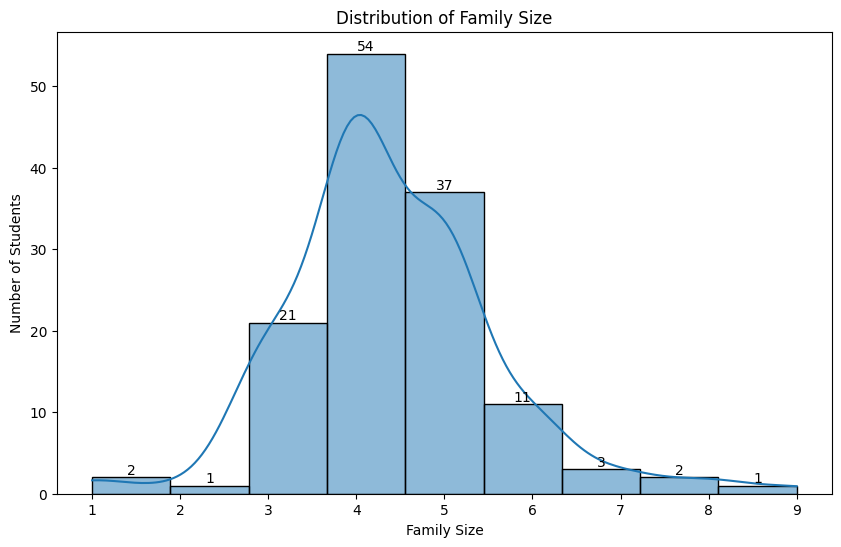

In [5]:
# Family size distribution among students
plt.figure(figsize=(10, 6))
ax = sns.histplot(df["Family"], bins=9, kde=True)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height}", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom"
    )
plt.xlabel("Family Size")
plt.ylabel("Number of Students")
plt.title("Distribution of Family Size")
plt.show()


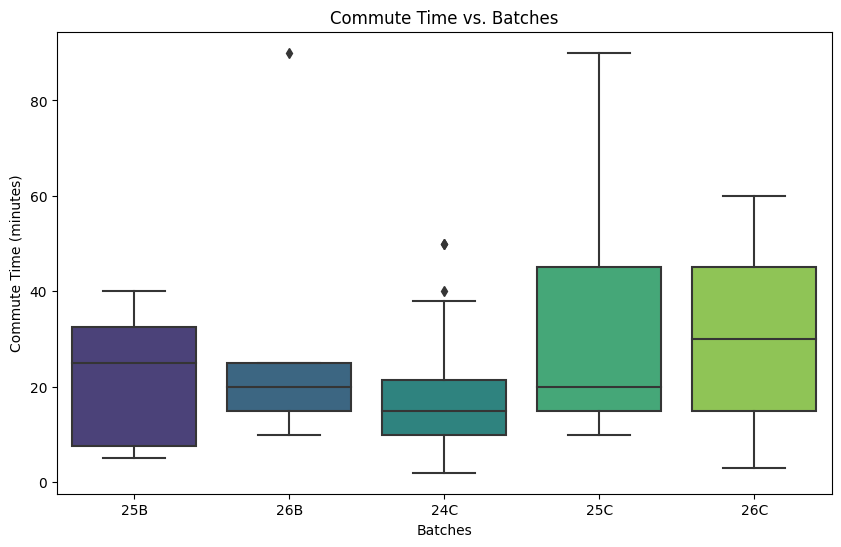

In [6]:
# Commute time with different batches
plt.figure(figsize=(10, 6))
sns.boxplot(x="Batch", y="Commute", data=df, palette="viridis")
plt.xlabel("Batches")
plt.ylabel("Commute Time (minutes)")
plt.title("Commute Time vs. Batches")
plt.show()


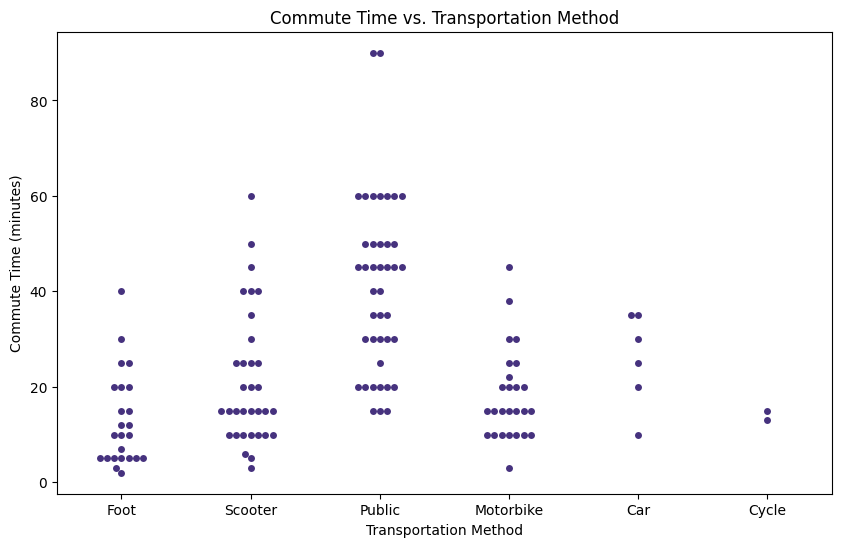

In [7]:
# Commute time with different transportation methods
sns.set_palette("viridis")
plt.figure(figsize=(10, 6))
sns.swarmplot(x="Transportation", y="Commute", data=df)
plt.xlabel("Transportation Method")
plt.ylabel("Commute Time (minutes)")
plt.title("Commute Time vs. Transportation Method")

plt.show()


In [8]:
df["Transportation"].value_counts(normalize=True)

Public       0.310606
Scooter      0.250000
Motorbike    0.196970
Foot         0.181818
Car          0.045455
Cycle        0.015152
Name: Transportation, dtype: float64

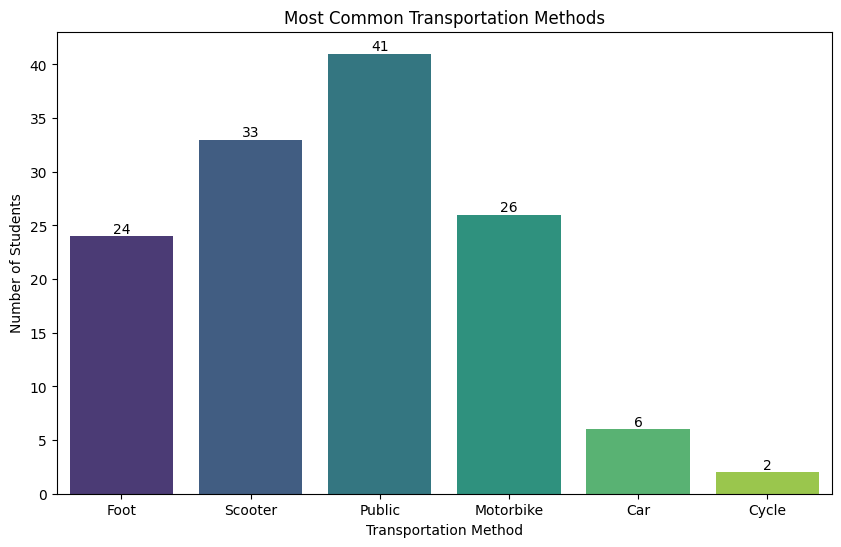

In [9]:
# Most common means of transportation used by students
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Transportation", data=df, palette="viridis")
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(
        f"{height}", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom"
    )
plt.xlabel("Transportation Method")
plt.ylabel("Number of Students")
plt.title("Most Common Transportation Methods")
plt.show()


In [10]:
(df['Area'].value_counts(normalize=True))*100

North East    21.969697
East          21.969697
North         16.666667
West          15.151515
South         14.393939
North West     8.333333
South West     1.515152
Name: Area, dtype: float64

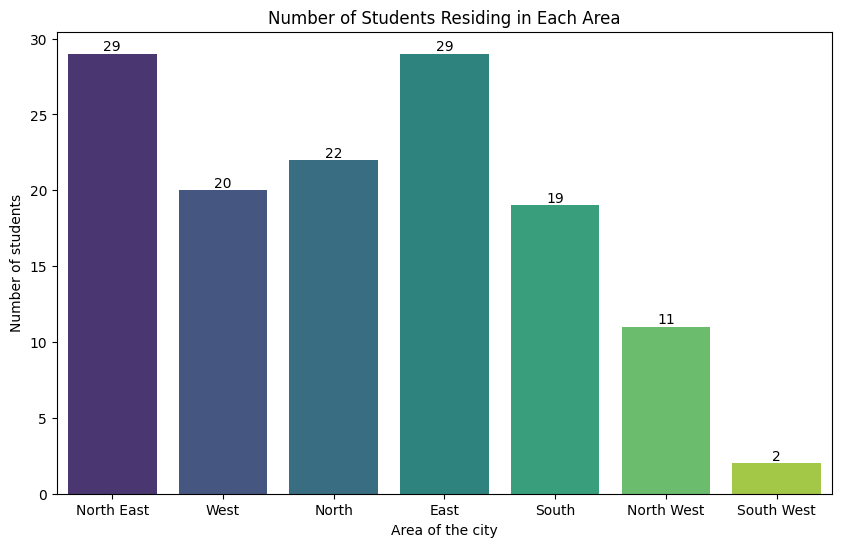

In [11]:
# Number of students residing in each area
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Area", data=df, palette="viridis")
for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(
        f"{height}", (p.get_x() + p.get_width() / 2, height), ha="center", va="bottom"
    )
plt.xlabel("Area of the city")
plt.ylabel("Number of students")
plt.title("Number of Students Residing in Each Area")
plt.show()


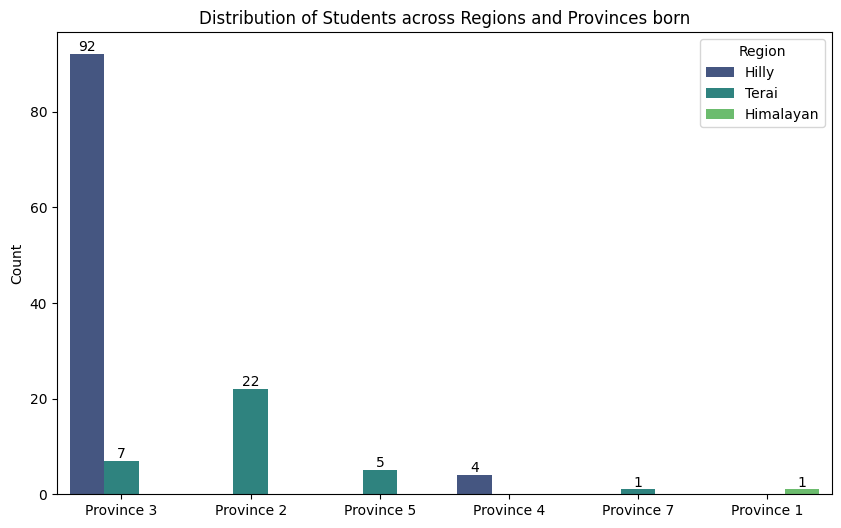

In [30]:
# Regions and provinces where most students come from
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="province", data=df, hue="region", palette="viridis")
for p in ax.patches:
    height = int(p.get_height())
    if height!=0:
        ax.annotate(
            f"{height}",
            (p.get_x() + p.get_width() / 2, height),
            ha="center",
            va="bottom",
        )
plt.xlabel(None)
plt.ylabel("Count")
plt.title("Distribution of Students across Regions and Provinces born")
plt.legend(title="Region", loc="upper right")
# plt.yscale("log")
plt.show()


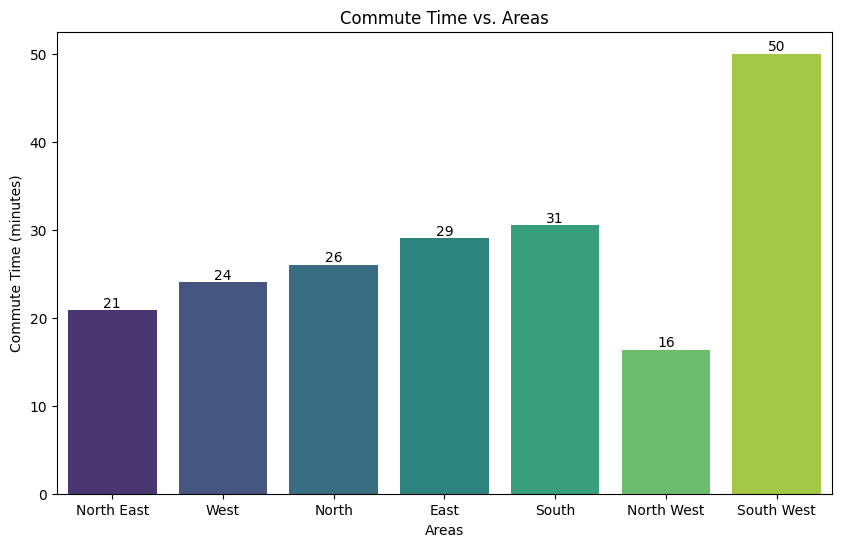

In [13]:
# Commute time with different areas
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Area", y="Commute", data=df,
                 palette="viridis", errorbar=None)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.0f}",
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
    )
plt.xlabel("Areas")
plt.ylabel("Commute Time (minutes)")
plt.title("Commute Time vs. Areas")
plt.show()


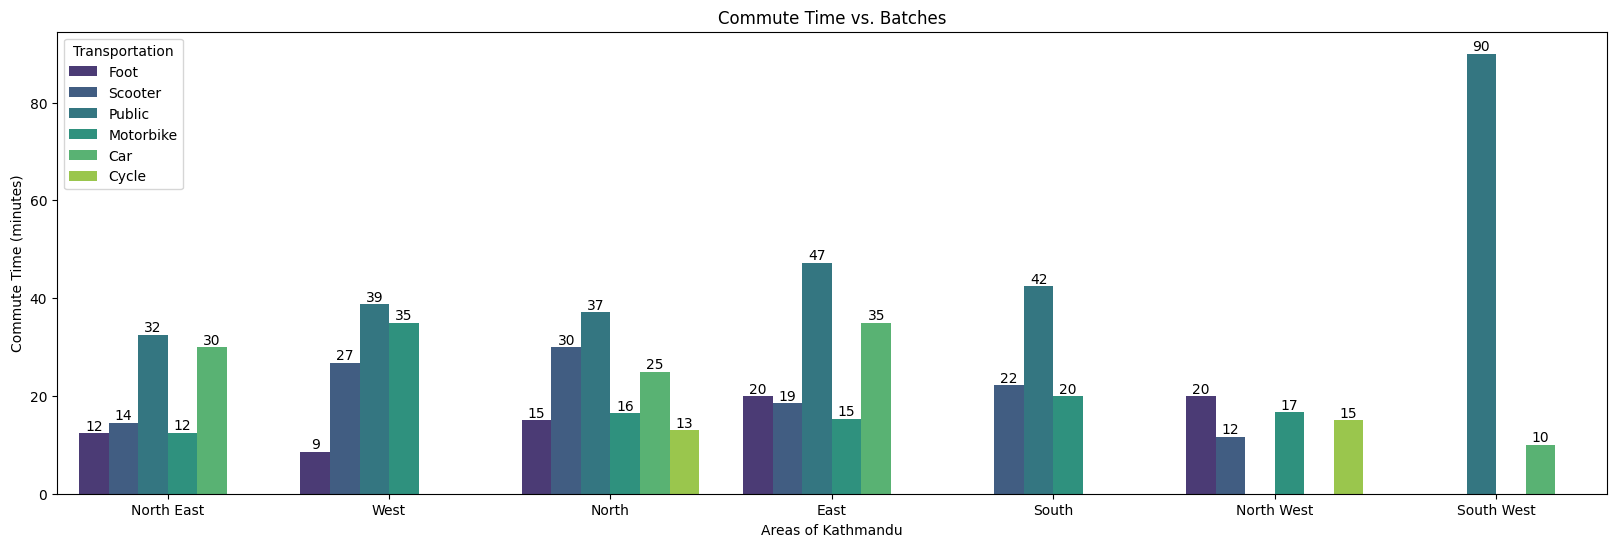

In [14]:
# Commute time with different batches
plt.figure(figsize=(20, 6))
ax = sns.barplot(
    x="Area",
    y="Commute",
    data=df,
    hue="Transportation",
    palette="viridis",
    errorbar=None,
)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.0f}",
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
        # rotation=90,
    )
plt.xlabel("Areas of Kathmandu")
plt.ylabel("Commute Time (minutes)")
plt.title("Commute Time vs. Batches")
plt.show()


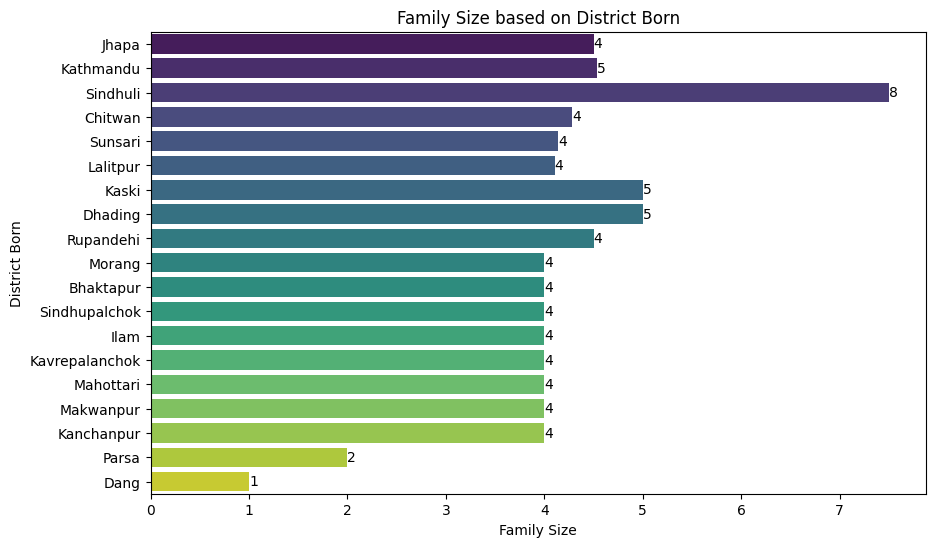

In [15]:
# Family size based on district born
sorted_df = df.sort_values(by="Family", ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Family", y="Born", data=sorted_df,
                 palette="viridis", errorbar=None)
for p in ax.patches:
    width = p.get_width()
    ax.annotate(
        f"{width:.0f}", (width, p.get_y() + p.get_height() / 2), va="center", ha="left"
    )
plt.xlabel("Family Size")
plt.ylabel("District Born")
plt.title("Family Size based on District Born")
plt.show()


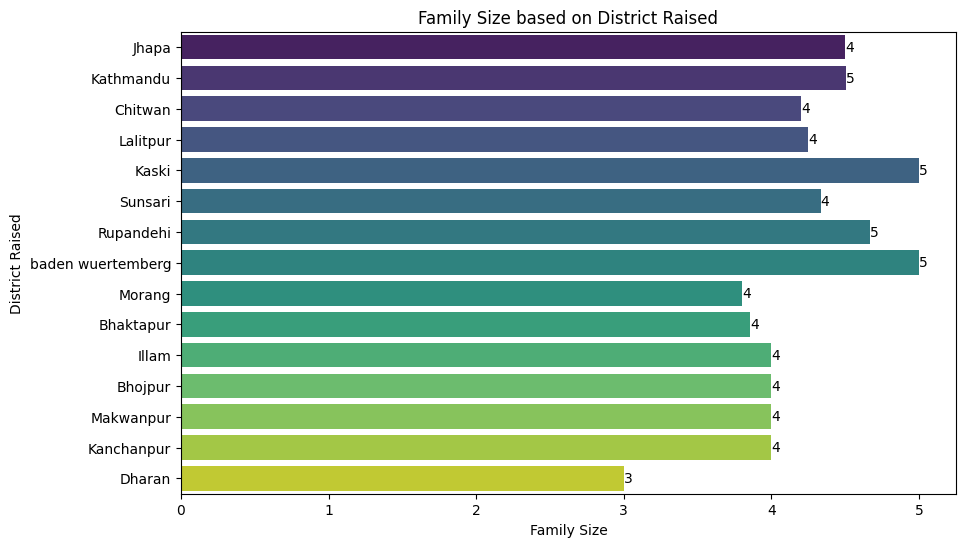

In [16]:
# Family size based of district raised
sorted_df = df.sort_values(by="Family", ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Family", y="Raised", data=sorted_df, palette="viridis", errorbar=None
)
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f"{width:.0f}", (width, p.get_y() +
                p.get_height() / 2), va="center")
plt.xlabel("Family Size")
plt.ylabel("District Raised")
plt.title("Family Size based on District Raised")
plt.show()


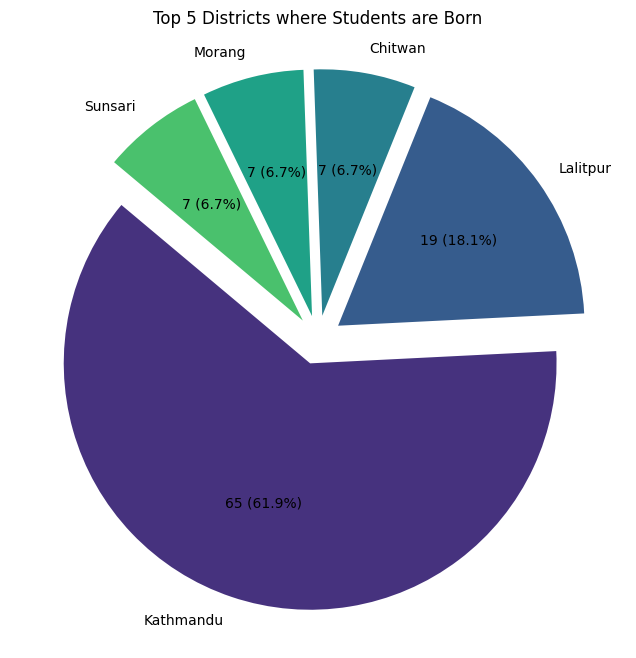

In [17]:
# Top districts were students are born
disct_counts = df["Born"].value_counts()
top_districts = disct_counts.head(5)
plt.figure(figsize=(8, 8))
sns.set_palette("viridis")
explode = [
    0.1 if district in top_districts.index else 0 for district in top_districts.index
]
plt.pie(
    top_districts,
    labels=top_districts.index,
    autopct=lambda p: "{:.0f} ({:.1f}%)".format(
        p * sum(top_districts) / 100, p),
    startangle=140,
    explode=explode,
)

plt.title("Top 5 Districts where Students are Born")
plt.show()


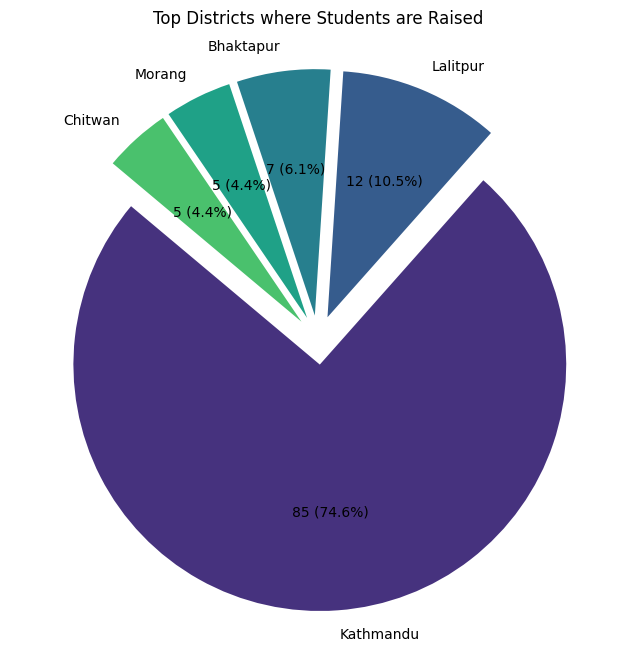

In [18]:
# top districts were students are raised
disct_counts = df["Raised"].value_counts()
top_districts = disct_counts.head()
plt.figure(figsize=(8, 8))
sns.set_palette("viridis")
explode = [
    0.1 if district in top_districts.index else 0 for district in top_districts.index
]
plt.pie(
    top_districts,
    labels=top_districts.index,
    autopct=lambda p: "{:.0f} ({:.1f}%)".format(
        p * sum(top_districts) / 100, p),
    startangle=140,
    explode=explode,
)
plt.title("Top Districts where Students are Raised")
plt.show()


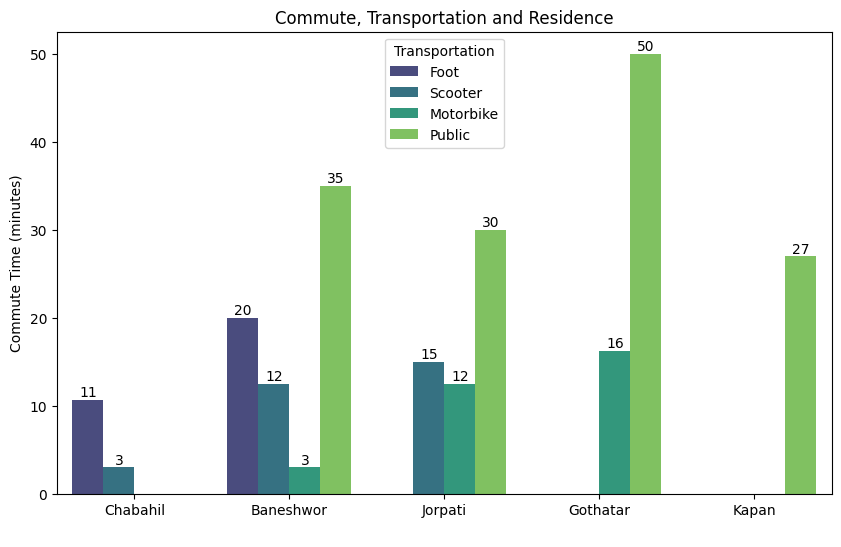

In [26]:
# Commute vs Transportation vs Residence
fig, ax = plt.subplots(figsize=(10, 6))
top_residences = df["Residence"].value_counts().head(5).index.tolist()
df_top_residences = df[df["Residence"].isin(top_residences)]
ax = sns.barplot(
    x="Residence",
    y="Commute",
    hue="Transportation",
    data=df_top_residences,
    ax=ax,
    errorbar=None,
    palette="viridis",
)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.0f}",
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
    )
ax.set_title("Commute, Transportation and Residence")
ax.set_xlabel(" ")
ax.set_ylabel("Commute Time (minutes)")
plt.show()


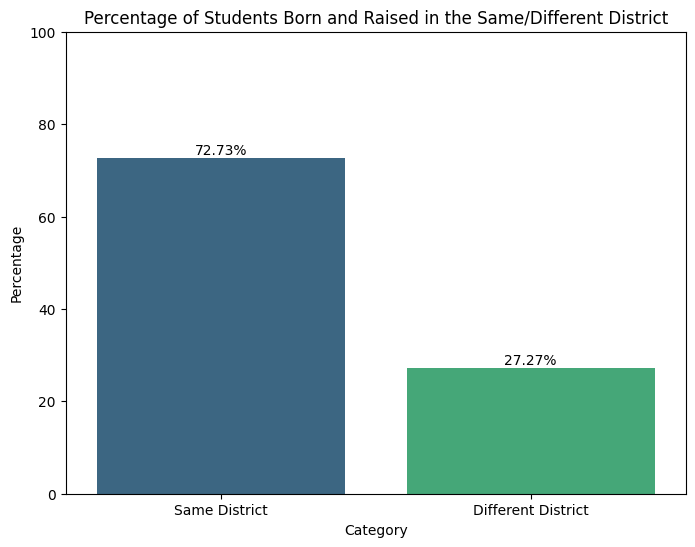

In [20]:
# Percentage of students born and raised in the same/different district
same_district_count = df[df["Born"] == df["Raised"]].shape[0]
total_students = df.shape[0]
same_district_percentage = (same_district_count / total_students) * 100

different_district_count = total_students - same_district_count
different_district_percentage = (
    different_district_count / total_students) * 100
data = {
    "Category": ["Same District", "Different District"],
    "Percentage": [same_district_percentage, different_district_percentage],
}
percentage_df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.barplot(x="Category", y="Percentage",
            data=percentage_df, palette="viridis")
plt.title("Percentage of Students Born and Raised in the Same/Different District")
plt.xlabel("Category")
plt.ylabel("Percentage")
plt.ylim(0, 100)

# Annotate
for index, value in enumerate(percentage_df["Percentage"]):
    plt.text(index, value, f"{value:.2f}%", ha="center", va="bottom")

plt.show()


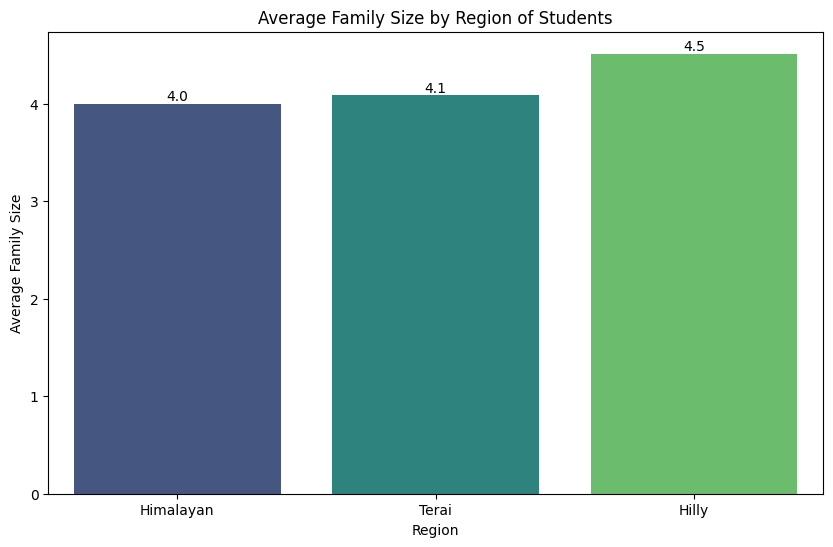

In [21]:
# Average family size by region of students born
average_family_size_by_region = df.groupby(
    "region")["Family"].mean().reset_index()
average_family_size_by_region = average_family_size_by_region.sort_values(
    by="Family")

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="region", y="Family", data=average_family_size_by_region, palette="viridis"
)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.1f}",
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
    )
plt.title("Average Family Size by Region of Students")
plt.xlabel("Region")
plt.ylabel("Average Family Size")

plt.show()


In [32]:
clean  = pd.read_csv("./datasets/Final.csv")
final = pd.read_csv("./datasets/student_demography.csv")

In [34]:
clean.drop(columns=['Unnamed: 0', "Id", ], inplace=True)
clean.head()

,Born,Raised,Residence,Transportation,Commute,Family,Area,Batch
0,Kathmandu,Kathmandu,Chabahil,Foot,25,3,North East,25B
1,Biratnagar,Biratnagar,kalo pul,Foot,5,4,West,25B
2,Kathmandu,Kathmandu,Narayantaar,Scooter,25,5,North,25B
3,Kathmandu,Kathmandu,Baneshwor,Scooter,10,8,East,25B
4,Lalitpur,Lalitpur,Godawari,Scooter,40,5,South,25B


In [36]:
final.drop(columns=['index', "Id", ], inplace=True)
final.head()


,Born,Raised,Residence,Transportation,Commute,Family,Area,Batch,province,region
0,Kathmandu,Kathmandu,Chabahil,Foot,25,3,North East,25B,Province 3,Hilly
1,Morang,Morang,kalo pul,Foot,5,4,West,25B,Province 2,Terai
2,Kathmandu,Kathmandu,Narayantaar,Scooter,25,5,North,25B,Province 3,Hilly
3,Kathmandu,Kathmandu,Baneshwor,Scooter,10,8,East,25B,Province 3,Hilly
4,Lalitpur,Lalitpur,Godawari,Scooter,40,5,South,25B,Province 3,Hilly


In [38]:
clean.to_csv("./datasets/cleaned_final_public.csv")
final.to_csv("./datasets/student_demography_public.csv")